In [302]:
# loading libraries and reading the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# read data from loan
loan_df = pd.read_csv("E:/AIML/GroupProject1/loan.csv", encoding = "UTF-8", low_memory=False)
# Select all required Columns:
loan_df = loan_df[['member_id', 'loan_amnt', 'funded_amnt', 'addr_state', 'funded_amnt_inv', 'home_ownership','grade','sub_grade', 'term', 'emp_length', 'int_rate', 'annual_inc', 'dti', 'issue_d','delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee', 'verification_status','purpose','title','recoveries', 'collection_recovery_fee', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'last_pymnt_d','last_pymnt_amnt','loan_status']]
#loan_df

In [303]:
# Do the data transformation/cleanup
print('Transform: term...')
loan_df['term'].replace(to_replace=' months', value='', regex=True, inplace=True)
loan_df['term'] = pd.to_numeric(loan_df['term'], errors='coerce')
print('Transform: int_rate...')
loan_df['int_rate'].replace(to_replace='%', value='', regex=True, inplace=True)
loan_df['int_rate'] = pd.to_numeric(loan_df['int_rate'], errors='coerce')
print('Transform: revol_util...')
loan_df['revol_util'].replace(to_replace='%', value='', regex=True, inplace=True)
loan_df['revol_util'] = pd.to_numeric(loan_df['revol_util'], errors='coerce')
print('Transform: emp_length...')
loan_df['emp_length'].replace('n/a', '0', inplace=True)
loan_df['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
loan_df['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
loan_df['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
loan_df['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)
loan_df['emp_length'] = pd.to_numeric(loan_df['emp_length'], errors='coerce')
print('Transform: issue date...')
# Transform the issue dates by year. %m/%d/%Y
loan_df.issue_d= loan_df.issue_d.apply(lambda x: datetime.datetime.strptime(x, '%b-%y'))
date_series = pd.to_datetime(loan_df['issue_d'], format = '%m/%d/%Y')
loan_df['year'] = date_series.dt.year
loan_df['month'] = date_series.dt.month
print('Transform done.')
loan_df

Transform: term...
Transform: int_rate...
Transform: revol_util...
Transform: emp_length...
Transform: issue date...
Transform done.


,member_id,loan_amnt,funded_amnt,addr_state,funded_amnt_inv,home_ownership,grade,sub_grade,term,emp_length,...,recoveries,collection_recovery_fee,total_pymnt,total_pymnt_inv,total_rec_prncp,last_pymnt_d,last_pymnt_amnt,loan_status,year,month
0,1296599,5000,5000,AZ,4975.00000,RENT,B,B2,36,10.0,...,0.00,0.0000,5863.155187,5833.84,5000.00,Jan-15,171.62,Fully Paid,2011,12
1,1314167,2500,2500,GA,2500.00000,RENT,C,C4,60,0.0,...,117.08,1.1100,1008.710000,1008.71,456.46,Apr-13,119.66,Charged Off,2011,12
2,1313524,2400,2400,IL,2400.00000,RENT,C,C5,36,10.0,...,0.00,0.0000,3005.666844,3005.67,2400.00,Jun-14,649.91,Fully Paid,2011,12
3,1277178,10000,10000,CA,10000.00000,RENT,C,C1,36,10.0,...,0.00,0.0000,12231.890000,12231.89,10000.00,Jan-15,357.48,Fully Paid,2011,12
4,1311748,3000,3000,OR,3000.00000,RENT,B,B5,60,1.0,...,0.00,0.0000,3513.330000,3513.33,2475.94,May-16,67.79,Current,2011,12
5,1311441,5000,5000,AZ,5000.00000,RENT,A,A4,36,3.0,...,0.00,0.0000,5632.210000,5632.21,5000.00,Jan-15,161.03,Fully Paid,2011,12
6,1304742,7000,7000,NC,7000.00000,RENT,C,C5,60,8.0,...,0.00,0.0000,10110.840000,10110.84,6985.61,May-16,1313.76,Fully Paid,2011,12
7,1288686,3000,3000,CA,3000.00000,RENT,E,E1,36,9.0,...,0.00,0.0000,3939.135294,3939.14,3000.00,Jan-15,111.34,Fully Paid,2011,12
8,1306957,5600,5600,CA,5600.00000,OWN,F,F2,60,4.0,...,189.06,2.0900,646.020000,646.02,162.02,Apr-12,152.39,Charged Off,2011,12
9,1306721,5375,5375,TX,5350.00000,RENT,B,B5,60,0.0,...,269.29,2.5200,1476.190000,1469.34,673.48,Nov-12,121.45,Charged Off,2011,12


In [304]:
# Missing values imputation
cols = ['term', 'loan_amnt', 'funded_amnt', 'int_rate', 'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'total_pymnt', 'total_pymnt_inv', 'last_pymnt_amnt','total_rec_prncp', 'emp_length']
for col in cols:
    print('Imputation with Median: %s' % (col))
    loan_df[col].fillna(loan_df[col].median(), inplace=True)

cols = ['total_rec_late_fee', 'recoveries', 'collection_recovery_fee']
for col in cols:
    print('Imputation with Zero: %s' % (col))
    loan_df[col].fillna(0, inplace=True)

print('Missing value imputation done.')

Imputation with Median: term
Imputation with Median: loan_amnt
Imputation with Median: funded_amnt
Imputation with Median: int_rate
Imputation with Median: annual_inc
Imputation with Median: dti
Imputation with Median: mths_since_last_delinq
Imputation with Median: mths_since_last_record
Imputation with Median: open_acc
Imputation with Median: revol_bal
Imputation with Median: revol_util
Imputation with Median: total_acc
Imputation with Median: total_rec_int
Imputation with Median: total_pymnt
Imputation with Median: total_pymnt_inv
Imputation with Median: last_pymnt_amnt
Imputation with Median: total_rec_prncp
Imputation with Median: emp_length
Imputation with Zero: total_rec_late_fee
Imputation with Zero: recoveries
Imputation with Zero: collection_recovery_fee
Missing value imputation done.


In [305]:
# summing up the missing values (column-wise)
print(loan_df.isnull().sum())
# sum it up to check how many rows have all missing values
print(loan_df.isnull().all(axis=1).sum())
# sum of misisng values in each row
print(loan_df.isnull().sum(axis=1))
# removing the two columns which is is still having missing values
loan_df = loan_df.drop('title', axis=1)
loan_df = loan_df.drop('last_pymnt_d', axis=1)

member_id                   0
loan_amnt                   0
funded_amnt                 0
addr_state                  0
funded_amnt_inv             0
home_ownership              0
grade                       0
sub_grade                   0
term                        0
emp_length                  0
int_rate                    0
annual_inc                  0
dti                         0
issue_d                     0
delinq_2yrs                 0
inq_last_6mths              0
mths_since_last_delinq      0
mths_since_last_record      0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
total_rec_int               0
total_rec_late_fee          0
verification_status         0
purpose                     0
title                      11
recoveries                  0
collection_recovery_fee     0
total_pymnt                 0
total_pymnt_inv             0
total_rec_prncp             0
last_pymnt

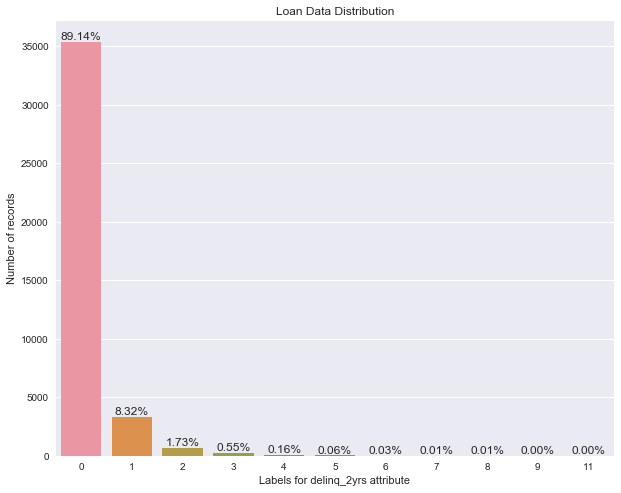

In [306]:
# Graphical representation of the loan data delinquency label percentage.
plt.figure(figsize=(10, 8))
sns.set()
sns.countplot(final_loan_df.delinq_2yrs).set_title('Loan Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/total_len)),
            fontsize=12, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Labels for delinq_2yrs attribute")
ax.set_ylabel("Number of records")
plt.show()

In [307]:
#  Which category of the target lebel is how many percentage.
total_len = len(final_loan_df['delinq_2yrs'])
percentage_labels = (final_loan_df['delinq_2yrs'].value_counts()/total_len)*100
percentage_labels

0     89.143188
1      8.316338
2      1.729738
3      0.553919
4      0.156104
5      0.055392
6      0.025178
7      0.010071
8      0.005036
11     0.002518
9      0.002518
Name: delinq_2yrs, dtype: float64

In [362]:
#Defaulters or risky loan applicants
df_defaulters = final_loan_df.loc[final_loan_df.delinq_2yrs > 0]

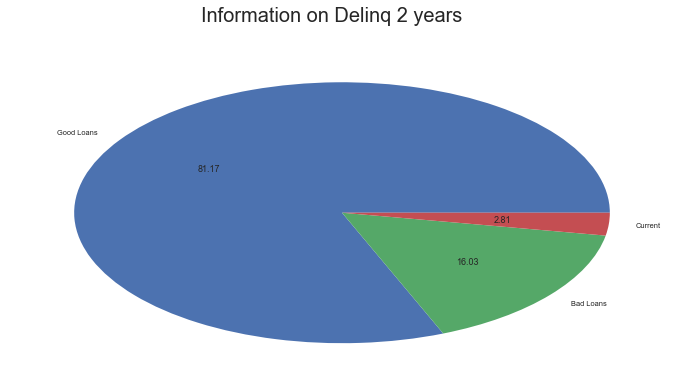

In [363]:
#Visual plot of pie to display where "Good", "Bad" and "Current" lie among delinq2yrs people
f, ax = plt.subplots(1,1, figsize=(12,6))

colors = ["#3791D7", "#D72626", "#fffb44"]
labels ="Good Loans", "Bad Loans", "Current"

plt.suptitle('Information on Delinq 2 years', fontsize=20)

plt.pie(df_defaulters.loan_status.value_counts(), labels=labels, autopct='%.2f')
plt.show()

Text(0.5,1,'Total committed by Investors')

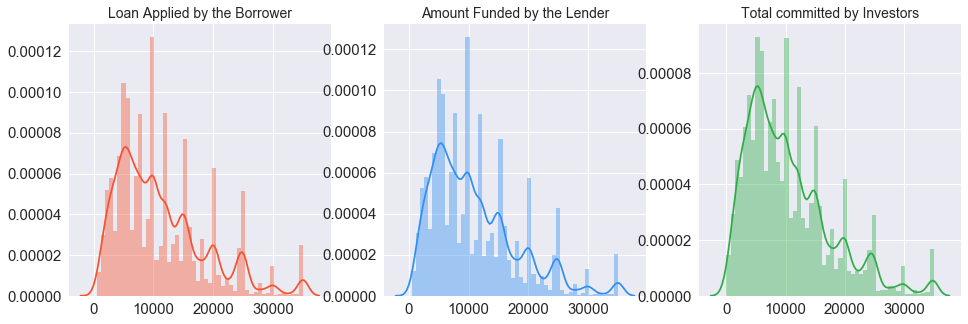

In [308]:
# Figure out most of the loan range issued in year
loan_amount = final_loan_df["loan_amnt"].values
funded_amount = final_loan_df["funded_amnt"].values
investor_funds = final_loan_df["funded_amnt_inv"].values

fig, ax = plt.subplots(1, 3, figsize=(16,5))

sns.distplot(loan_amount, ax=ax[0], color="#F7522F")
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)
sns.distplot(funded_amount, ax=ax[1], color="#2F8FF7")
ax[1].set_title("Amount Funded by the Lender", fontsize=14)
sns.distplot(investor_funds, ax=ax[2], color="#2EAD46")
ax[2].set_title("Total committed by Investors", fontsize=14)

Text(0,0.5,'Average loan amount issued')

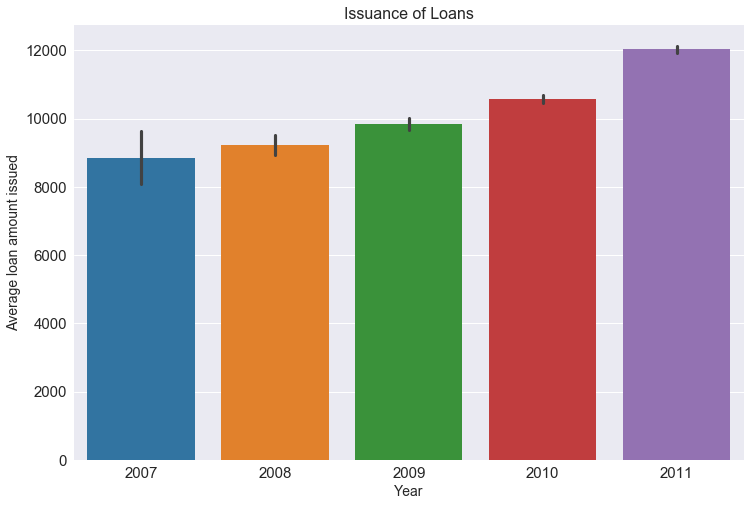

In [309]:
# Figure out most of the loan issued in year
# The year of 2011 was the year were the loans were issued 
plt.figure(figsize=(12,8))
sns.barplot('year', 'loan_amnt', data=final_loan_df, palette='tab10')
plt.title('Issuance of Loans', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average loan amount issued', fontsize=14)

In [310]:
# Determining the loans that are bad from loan_status column
bad_loan = ["Charged Off"]
final_loan_df['loan_condition'] = np.nan
def loan_condition(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'
        
final_loan_df['loan_condition'] = final_loan_df['loan_status'].apply(loan_condition)
final_loan_df

,member_id,loan_amnt,funded_amnt,addr_state,funded_amnt_inv,home_ownership,grade,sub_grade,term,emp_length,...,bad_state,avl_lines,int_paid,emi_paid_progress_perc,total_repayment_progress,loan_condition,region,income_category,loan_condition_int,interest_payments
0,1296599,5000,5000,AZ,4975.00000,RENT,B,B2,36,10.0,...,0.0,6,863.16,57.324841,57.324841,Good Loan,SouthWest,Low,0,Low
1,1314167,2500,2500,GA,2500.00000,RENT,C,C4,60,0.0,...,1.0,1,435.17,34.482759,39.165959,Bad Loan,SouthEast,Low,1,High
2,1313524,2400,2400,IL,2400.00000,RENT,C,C5,36,10.0,...,0.0,8,605.67,57.324841,57.324841,Good Loan,MidWest,Low,0,High
3,1277178,10000,10000,CA,10000.00000,RENT,C,C1,36,10.0,...,1.0,27,2231.89,57.324841,57.324841,Good Loan,West,Low,0,High
4,1311748,3000,3000,OR,3000.00000,RENT,B,B5,60,1.0,...,0.0,23,1037.39,34.482759,34.482759,Good Loan,West,Low,0,Low
5,1311441,5000,5000,AZ,5000.00000,RENT,A,A4,36,3.0,...,0.0,3,632.21,57.324841,57.324841,Good Loan,SouthWest,Low,0,Low
6,1304742,7000,7000,NC,7000.00000,RENT,C,C5,60,8.0,...,0.0,4,3125.23,34.482759,34.482759,Good Loan,SouthEast,Low,0,High
7,1288686,3000,3000,CA,3000.00000,RENT,E,E1,36,9.0,...,0.0,0,939.14,57.324841,57.324841,Good Loan,West,Low,0,High
8,1306957,5600,5600,CA,5600.00000,OWN,F,F2,60,4.0,...,1.0,2,294.94,34.482759,37.858830,Bad Loan,West,Low,1,High
9,1306721,5375,5375,TX,5350.00000,RENT,B,B5,60,0.0,...,1.0,1,533.42,34.482759,39.516217,Bad Loan,SouthWest,Low,1,Low


[Text(0,0.5,'(%)')]

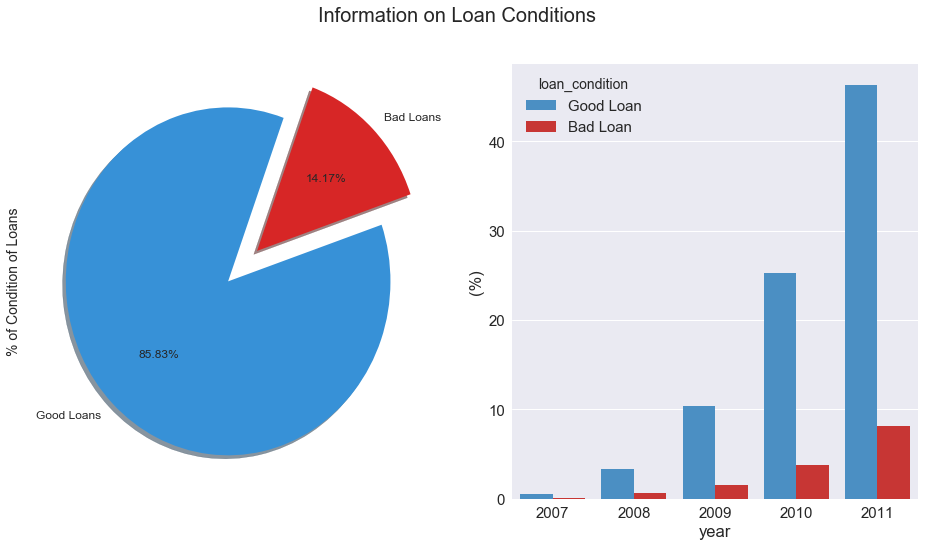

In [311]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#3791D7", "#D72626"]
labels ="Good Loans", "Bad Loans"

plt.suptitle('Information on Loan Conditions', fontsize=20)

final_loan_df["loan_condition"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)

ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

palette = ["#3791D7", "#E01E1B"]

sns.barplot(x="year", y="loan_amnt", hue="loan_condition", data=final_loan_df, palette=palette, estimator=lambda x: len(x) / len(loan_df) * 100)
ax[1].set(ylabel="(%)")

In [312]:
final_loan_df['addr_state'].unique()

# Make a list with each of the regions by state and defining regions

west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']

final_loan_df['region'] = np.nan

def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'

final_loan_df['region'] = final_loan_df['addr_state'].apply(finding_regions)
final_loan_df

,member_id,loan_amnt,funded_amnt,addr_state,funded_amnt_inv,home_ownership,grade,sub_grade,term,emp_length,...,bad_state,avl_lines,int_paid,emi_paid_progress_perc,total_repayment_progress,loan_condition,region,income_category,loan_condition_int,interest_payments
0,1296599,5000,5000,AZ,4975.00000,RENT,B,B2,36,10.0,...,0.0,6,863.16,57.324841,57.324841,Good Loan,SouthWest,Low,0,Low
1,1314167,2500,2500,GA,2500.00000,RENT,C,C4,60,0.0,...,1.0,1,435.17,34.482759,39.165959,Bad Loan,SouthEast,Low,1,High
2,1313524,2400,2400,IL,2400.00000,RENT,C,C5,36,10.0,...,0.0,8,605.67,57.324841,57.324841,Good Loan,MidWest,Low,0,High
3,1277178,10000,10000,CA,10000.00000,RENT,C,C1,36,10.0,...,1.0,27,2231.89,57.324841,57.324841,Good Loan,West,Low,0,High
4,1311748,3000,3000,OR,3000.00000,RENT,B,B5,60,1.0,...,0.0,23,1037.39,34.482759,34.482759,Good Loan,West,Low,0,Low
5,1311441,5000,5000,AZ,5000.00000,RENT,A,A4,36,3.0,...,0.0,3,632.21,57.324841,57.324841,Good Loan,SouthWest,Low,0,Low
6,1304742,7000,7000,NC,7000.00000,RENT,C,C5,60,8.0,...,0.0,4,3125.23,34.482759,34.482759,Good Loan,SouthEast,Low,0,High
7,1288686,3000,3000,CA,3000.00000,RENT,E,E1,36,9.0,...,0.0,0,939.14,57.324841,57.324841,Good Loan,West,Low,0,High
8,1306957,5600,5600,CA,5600.00000,OWN,F,F2,60,4.0,...,1.0,2,294.94,34.482759,37.858830,Bad Loan,West,Low,1,High
9,1306721,5375,5375,TX,5350.00000,RENT,B,B5,60,0.0,...,1.0,1,533.42,34.482759,39.516217,Bad Loan,SouthWest,Low,1,Low


Text(0.5,1,'Loans issued by Region')

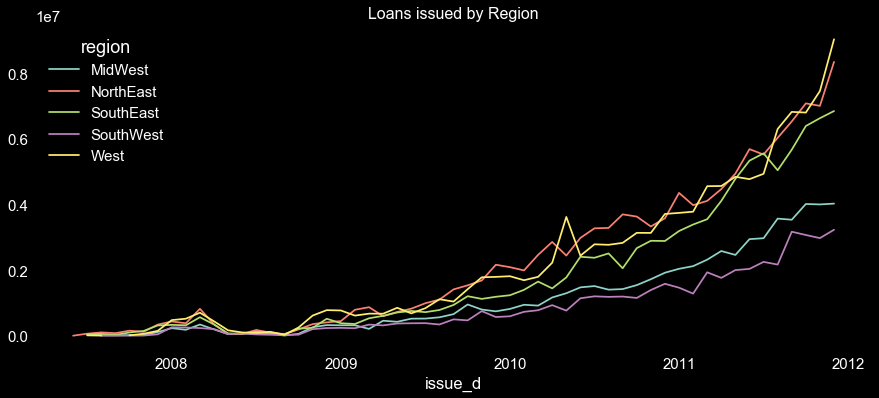

In [313]:
# Region wise loan issued
df_dates = pd.DataFrame(data=final_loan_df[['issue_d','region','loan_amnt']])
plt.style.use('dark_background')
cmap = plt.cm.Set3

by_issued_amount = df_dates.groupby(['issue_d', 'region']).loan_amnt.sum()
by_issued_amount.unstack().plot(stacked=False, colormap=cmap, grid=False, legend=True, figsize=(15,6))

plt.title('Loans issued by Region', fontsize=16)

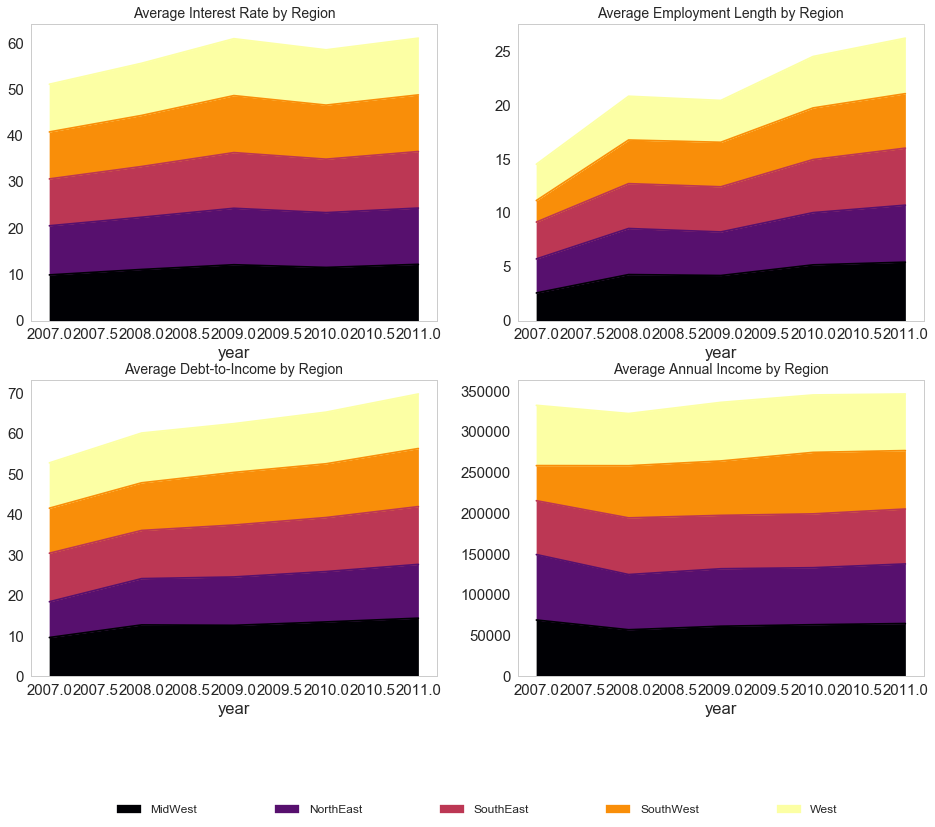

In [314]:
# Loan issued by Region and by interest rate, employment, debt to income, employment length

sns.set_style('whitegrid')

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
cmap = plt.cm.inferno

by_interest_rate = final_loan_df.groupby(['year', 'region']).int_rate.mean()
by_interest_rate.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax1, figsize=(16,12))
ax1.set_title('Average Interest Rate by Region', fontsize=14)


by_employment_length = final_loan_df.groupby(['year', 'region']).emp_length.mean()
by_employment_length.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax2, figsize=(16,12))
ax2.set_title('Average Employment Length by Region', fontsize=14)

by_dti = final_loan_df.groupby(['year', 'region']).dti.mean()
by_dti.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax3, figsize=(16,12))
ax3.set_title('Average Debt-to-Income by Region', fontsize=14)

by_income = final_loan_df.groupby(['year', 'region']).annual_inc.mean()
by_income.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, ax=ax4, figsize=(16,12))
ax4.set_title('Average Annual Income by Region', fontsize=14)
ax4.legend(bbox_to_anchor=(-1.0, -0.5, 1.8, 0.1), loc=10,prop={'size':12},
           ncol=5, mode="expand", borderaxespad=0.)

In [318]:
# Region wise categorized as bad loans
badloans_df = final_loan_df.loc[final_loan_df["loan_condition"] == "Bad Loan"]
# loan_status cross
loan_status_cross = pd.crosstab(badloans_df['region'], badloans_df['loan_status']).apply(lambda x: x/x.sum() * 100)
number_of_loanstatus = pd.crosstab(badloans_df['region'], badloans_df['loan_status'])

# Round our values
loan_status_cross['Charged Off'] = loan_status_cross['Charged Off'].apply(lambda x: round(x, 2))

number_of_loanstatus['Total'] = number_of_loanstatus.sum(axis=1) 
# number_of_badloans
number_of_loanstatus


loan_status,Charged Off,Total
region,,
MidWest,759,759
NorthEast,1424,1424
SouthEast,1307,1307
SouthWest,509,509
West,1628,1628


In [319]:
# stateswise loan rate and annual income
# Grouping by our metrics

by_loan_amount = final_loan_df.groupby(['region','addr_state'], as_index=False).loan_amnt.sum()
by_interest_rate = final_loan_df.groupby(['region', 'addr_state'], as_index=False).int_rate.mean()
by_income = final_loan_df.groupby(['region', 'addr_state'], as_index=False).annual_inc.mean()

# Take the values to a list for visualization purposes.
states = by_loan_amount['addr_state'].values.tolist()
average_loan_amounts = by_loan_amount['loan_amnt'].values.tolist()
average_interest_rates = by_interest_rate['int_rate'].values.tolist()
average_annual_income = by_income['annual_inc'].values.tolist()


from collections import OrderedDict

# Perspective for the Business Operations
metrics_data = OrderedDict([('state_codes', states),
                            ('issued_loans', average_loan_amounts),
                            ('interest_rate', average_interest_rates),
                            ('annual_income', average_annual_income)])
                     
metrics_df = pd.DataFrame.from_dict(metrics_data)
metrics_df = metrics_df.round(decimals=2)
metrics_df.head()


,state_codes,issued_loans,interest_rate,annual_income
0,IA,56450,8.97,50599.20
1,IL,17473900,12.03,69788.22
2,IN,86225,10.80,35416.11
3,KS,2952525,11.75,62481.15
4,MI,8085325,11.94,65325.80


In [320]:
# Now it comes the part where in United States
metrics_df_sum = metrics_df.sort_values(['issued_loans'],ascending=False)
metrics_df_sum

,state_codes,issued_loans,interest_rate,annual_income
40,CA,80359325,12.13,71828.92
17,NY,42972850,12.09,71544.57
38,TX,31899450,12.03,73519.69
25,FL,30866175,11.95,64520.64
16,NJ,21930050,12.22,74755.45
1,IL,17473900,12.03,69788.22
33,VA,16246700,12.18,73922.29
18,PA,16119725,11.67,62424.37
26,GA,15814800,11.92,68884.56
12,MA,15228775,11.82,72773.36


In [321]:
# Create categories for annual_income since most of the bad loans are located below 100k

final_loan_df['income_category'] = np.nan
lst = [final_loan_df]

for col in lst:
    col.loc[col['annual_inc'] <= 100000, 'income_category'] = 'Low'
    col.loc[(col['annual_inc'] > 100000) & (col['annual_inc'] <= 200000), 'income_category'] = 'Medium'
    col.loc[col['annual_inc'] > 200000, 'income_category'] = 'High'
# Transform the column loan_condition into integrers.
lst_new = [final_loan_df]
final_loan_df['loan_condition_int'] = np.nan

for col in lst_new:
    col.loc[final_loan_df['loan_condition'] == 'Good Loan', 'loan_condition_int'] = 0 # Negative (Bad Loan)
    col.loc[final_loan_df['loan_condition'] == 'Bad Loan', 'loan_condition_int'] = 1 # Positive (Good Loan)
    
# Convert from float to int the column 
final_loan_df['loan_condition_int'] = final_loan_df['loan_condition_int'].astype(int)
final_loan_df

,member_id,loan_amnt,funded_amnt,addr_state,funded_amnt_inv,home_ownership,grade,sub_grade,term,emp_length,...,bad_state,avl_lines,int_paid,emi_paid_progress_perc,total_repayment_progress,loan_condition,region,income_category,loan_condition_int,interest_payments
0,1296599,5000,5000,AZ,4975.00000,RENT,B,B2,36,10.0,...,0.0,6,863.16,57.324841,57.324841,Good Loan,SouthWest,Low,0,Low
1,1314167,2500,2500,GA,2500.00000,RENT,C,C4,60,0.0,...,1.0,1,435.17,34.482759,39.165959,Bad Loan,SouthEast,Low,1,High
2,1313524,2400,2400,IL,2400.00000,RENT,C,C5,36,10.0,...,0.0,8,605.67,57.324841,57.324841,Good Loan,MidWest,Low,0,High
3,1277178,10000,10000,CA,10000.00000,RENT,C,C1,36,10.0,...,1.0,27,2231.89,57.324841,57.324841,Good Loan,West,Low,0,High
4,1311748,3000,3000,OR,3000.00000,RENT,B,B5,60,1.0,...,0.0,23,1037.39,34.482759,34.482759,Good Loan,West,Low,0,Low
5,1311441,5000,5000,AZ,5000.00000,RENT,A,A4,36,3.0,...,0.0,3,632.21,57.324841,57.324841,Good Loan,SouthWest,Low,0,Low
6,1304742,7000,7000,NC,7000.00000,RENT,C,C5,60,8.0,...,0.0,4,3125.23,34.482759,34.482759,Good Loan,SouthEast,Low,0,High
7,1288686,3000,3000,CA,3000.00000,RENT,E,E1,36,9.0,...,0.0,0,939.14,57.324841,57.324841,Good Loan,West,Low,0,High
8,1306957,5600,5600,CA,5600.00000,OWN,F,F2,60,4.0,...,1.0,2,294.94,34.482759,37.858830,Bad Loan,West,Low,1,High
9,1306721,5375,5375,TX,5350.00000,RENT,B,B5,60,0.0,...,1.0,1,533.42,34.482759,39.516217,Bad Loan,SouthWest,Low,1,Low


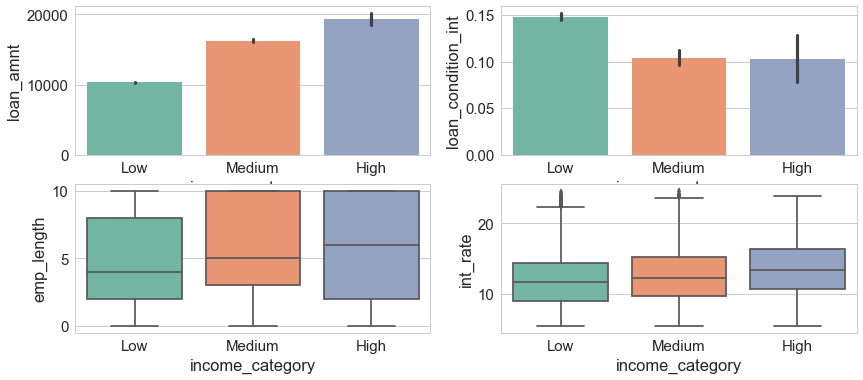

In [322]:
# Plot the loan amount, interest rate, loan condition, employment length
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(nrows=2, ncols=2, figsize=(14,6))

sns.barplot(x="income_category", y="loan_amnt", data=final_loan_df, palette="Set2", ax=ax1 )
sns.barplot(x="income_category", y="loan_condition_int", data=final_loan_df, palette="Set2", ax=ax2)
sns.boxplot(x="income_category", y="emp_length", data=final_loan_df, palette="Set2", ax=ax3)
sns.boxplot(x="income_category", y="int_rate", data=final_loan_df, palette="Set2", ax=ax4)

In [323]:
#Asserting the risk
by_condition = final_loan_df.groupby('addr_state')['loan_condition'].value_counts()/ final_loan_df.groupby('addr_state')['loan_condition'].count()
by_emp_length = final_loan_df.groupby(['region', 'addr_state'], as_index=False).emp_length.mean().sort_values(by="addr_state")

loan_condition_bystate = pd.crosstab(final_loan_df['addr_state'], final_loan_df['loan_condition'] )
cross_condition = pd.crosstab(final_loan_df["addr_state"], final_loan_df["loan_condition"])
# Percentage of condition of loan
percentage_loan_contributor = pd.crosstab(final_loan_df['addr_state'], final_loan_df['loan_condition']).apply(lambda x: x/x.sum() * 100)
condition_ratio = cross_condition["Bad Loan"]/cross_condition["Good Loan"]
by_dti = final_loan_df.groupby(['region', 'addr_state'], as_index=False).dti.mean()
state_codes = sorted(states)

# Take to a list
default_ratio = condition_ratio.values.tolist()
average_dti = by_dti['dti'].values.tolist()
average_emp_length = by_emp_length["emp_length"].values.tolist()
number_of_badloans = loan_condition_bystate['Bad Loan'].values.tolist()
percentage_ofall_badloans = percentage_loan_contributor['Bad Loan'].values.tolist()


# Perspective of the business
risk_data = OrderedDict([('state_codes', state_codes),
                         ('default_ratio', default_ratio),
                         ('badloans_amount', number_of_badloans),
                         ('percentage_of_badloans', percentage_ofall_badloans),
                         ('average_dti', average_dti),
                         ('average_emp_length', average_emp_length)])


# Dataframe 
risk_df = pd.DataFrame.from_dict(risk_data)
risk_df = risk_df.round(decimals=3)
# locationwise in United States
risk_df_sum = risk_df.sort_values(['percentage_of_badloans'],ascending=False)
risk_df_sum

,state_codes,default_ratio,badloans_amount,percentage_of_badloans,average_dti,average_emp_length
4,CA,0.188,1125,19.993,13.570,4.834
9,FL,0.213,504,8.957,14.753,4.953
33,NY,0.149,495,8.797,13.389,4.874
42,TX,0.131,316,5.616,13.853,4.770
30,NJ,0.177,278,4.940,13.871,4.950
10,GA,0.182,215,3.821,13.433,5.067
14,IL,0.148,197,3.501,9.710,5.020
37,PA,0.135,180,3.199,14.075,5.005
44,VA,0.144,177,3.146,13.708,4.792
20,MD,0.183,162,2.879,13.519,4.864


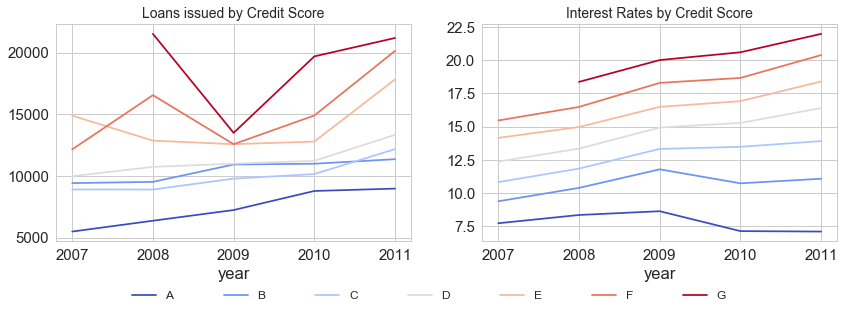

In [324]:
# Visualize how many loans were issued by creditscore
f, ((ax1, ax2)) = plt.subplots(1, 2)
cmap = plt.cm.coolwarm

by_credit_score = final_loan_df.groupby(['year', 'grade']).loan_amnt.mean()
by_credit_score.unstack().plot(legend=False, ax=ax1, figsize=(14, 4), colormap=cmap)
ax1.set_title('Loans issued by Credit Score', fontsize=14)
    
by_inc = final_loan_df.groupby(['year', 'grade']).int_rate.mean()
by_inc.unstack().plot(ax=ax2, figsize=(14, 4), colormap=cmap)
ax2.set_title('Interest Rates by Credit Score', fontsize=14)

ax2.legend(bbox_to_anchor=(-1.0, -0.3, 1.7, 0.1), loc=5, prop={'size':12},
           ncol=7, mode="expand", borderaxespad=0.)

Text(0,0.5,'Interest Rate (%)')

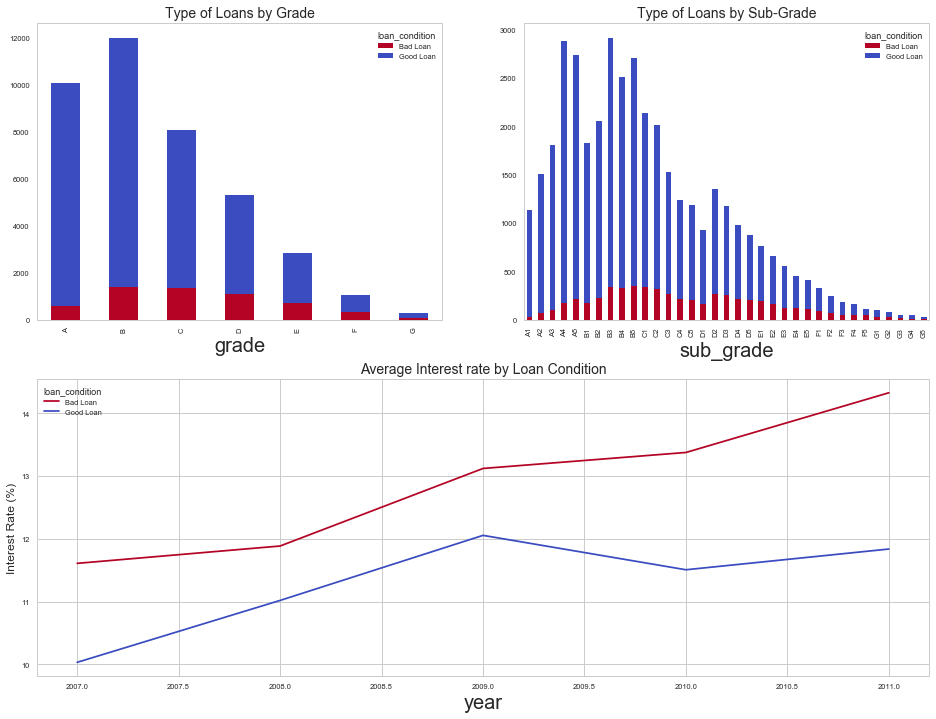

In [396]:
# Loan Condition year wise, grade, sub grade
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

cmap = plt.cm.coolwarm_r

loans_by_region = final_loan_df.groupby(['grade', 'loan_condition']).size()
loans_by_region.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
ax1.set_title('Type of Loans by Grade', fontsize=14)

loans_by_grade = final_loan_df.groupby(['sub_grade', 'loan_condition']).size()
loans_by_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax2, grid=False)
ax2.set_title('Type of Loans by Sub-Grade', fontsize=14)

by_interest = final_loan_df.groupby(['year', 'loan_condition']).int_rate.mean()
by_interest.unstack().plot(ax=ax3, colormap=cmap)
ax3.set_title('Average Interest rate by Loan Condition', fontsize=14)
ax3.set_ylabel('Interest Rate (%)', fontsize=12)

In [411]:
eda_home_df=pd.DataFrame(final_loan_df.groupby([final_loan_df.home_ownership, final_loan_df.term]).loan_status.value_counts())
eda_home_df.rename(columns={'loan_status':'count_default' }, inplace=True)
eda_home_df= eda_home_df.reset_index()
eda_home_df

,home_ownership,term,loan_status,count_default
0,MORTGAGE,36,Fully Paid,10822
1,MORTGAGE,36,Charged Off,1181
2,MORTGAGE,60,Fully Paid,3872
3,MORTGAGE,60,Charged Off,1146
4,MORTGAGE,60,Current,638
5,NONE,36,Fully Paid,3
6,OTHER,36,Fully Paid,80
7,OTHER,36,Charged Off,17
8,OTHER,60,Charged Off,1
9,OWN,36,Fully Paid,2049


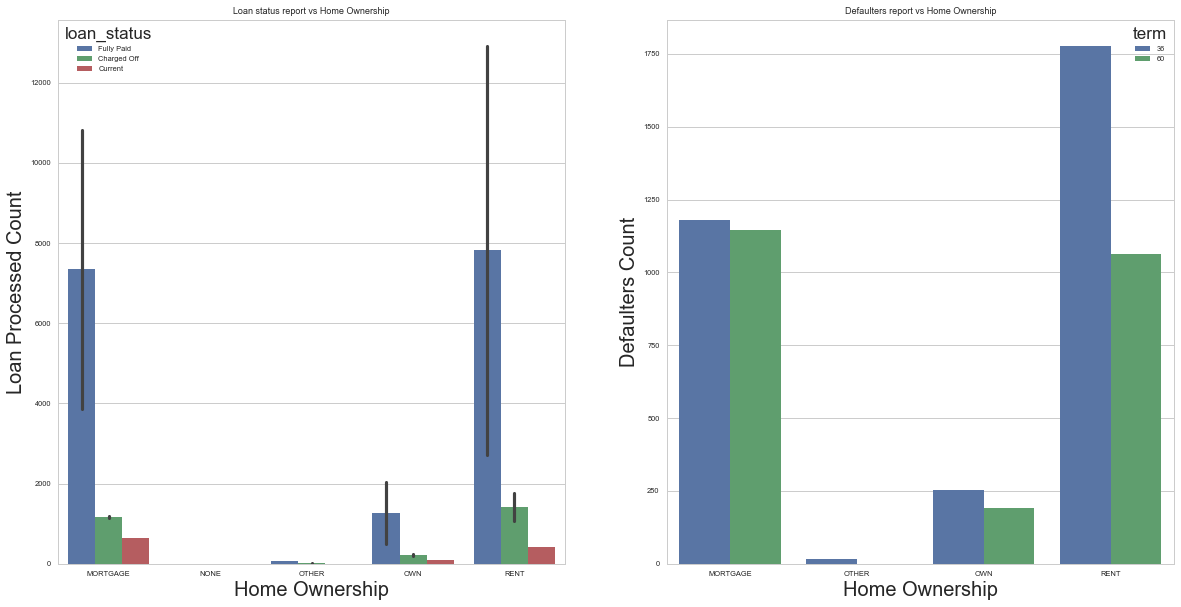

In [412]:

plt.figure(figsize=(20,10))
plt.rc('axes', labelsize=20)
plt.rc('figure', titlesize=12)
sns.set_style("whitegrid")

plt.subplot(1,2,1)
sns.barplot(x= 'home_ownership' , y= 'count_default' ,hue='loan_status' ,data= eda_home_df)
plt.title("Loan status report vs Home Ownership")
plt.xlabel("Home Ownership")
plt.ylabel("Loan Processed Count")

plt.subplot(1,2, 2)
sns.barplot(x= 'home_ownership' , y= 'count_default' ,hue= 'term',data= eda_home_df[eda_home_df.loan_status=='Charged Off'])
plt.title("Defaulters report vs Home Ownership")
plt.xlabel("Home Ownership")
plt.ylabel("Defaulters Count")

plt.show()

In [413]:
eda_final= final_loan_df[(final_loan_df.home_ownership.isin(['RENT', 'MORTGAGE'])) & (final_loan_df.purpose.isin( ['debt_consolidation','other','credit_card', 'small_business' ]))]

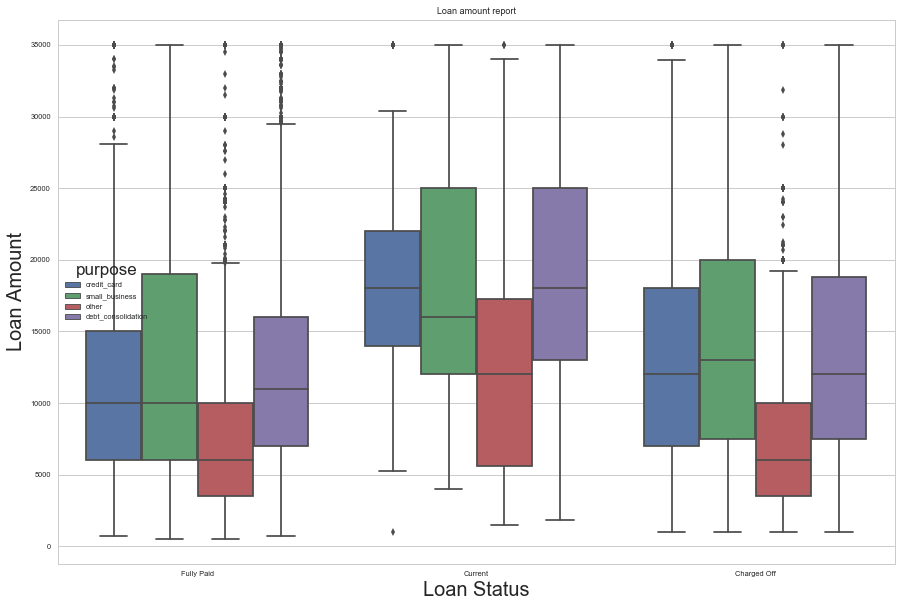

In [414]:
plt.figure(figsize=(15,10))
sns.boxplot(y= 'loan_amnt' , x= 'loan_status', hue='purpose' , data= eda_final)

sns.set_style("whitegrid")
plt.title("Loan amount report")
plt.ylabel("Loan Amount")
plt.xlabel("Loan Status")
plt.show()

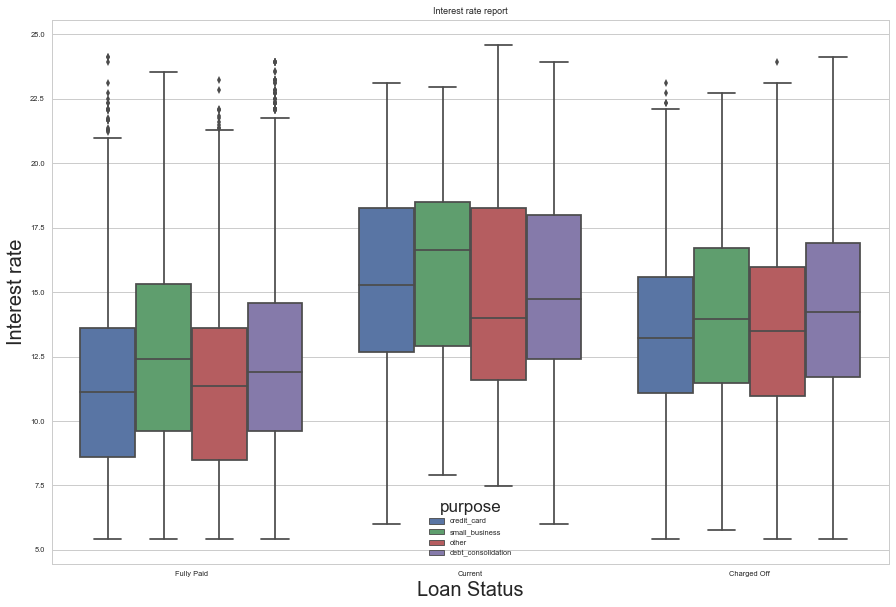

In [415]:
plt.figure(figsize=(15,10))
sns.boxplot(y= 'int_rate' , x= 'loan_status' , hue='purpose', data= eda_final)
sns.set_style("whitegrid")
plt.title("Interest rate report")
plt.ylabel("Interest rate")
plt.xlabel("Loan Status")
plt.show()

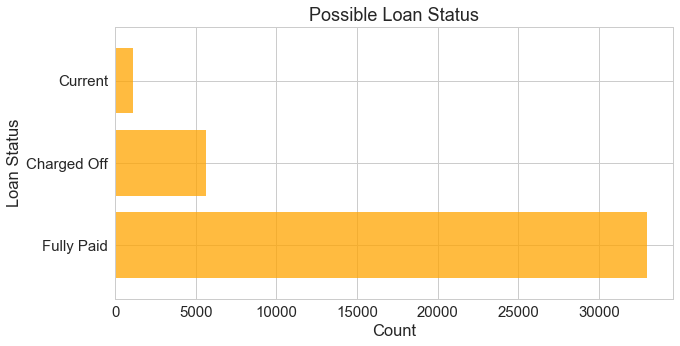

In [326]:
# Loan status count plotting
plt.figure(figsize=(10, 5))
loan_plot = final_loan_df['loan_status'].value_counts().plot(kind= 'barh', width=.8, color = 'orange', title = 'Possible Loan Status', alpha = 0.75)
loan_plot.set_xlabel('Count')
loan_plot.set_ylabel('Loan Status')
plt.show()

In [384]:
# Correlation
features = ['loan_amnt','funded_amnt_inv','emp_length','annual_inc','home_ownership','grade','term',
            'last_pymnt_amnt', 'pub_rec', 'int_rate', 'total_acc','open_acc','loan_status'] 
df_correlations = final_loan_df[features]
df_correlations['loan_status'].value_counts()
df_correlations.corr()

,loan_amnt,funded_amnt_inv,emp_length,annual_inc,term,last_pymnt_amnt,pub_rec,int_rate,total_acc,open_acc
loan_amnt,1.000000,0.940034,0.155524,0.271149,0.361036,0.448742,-0.051236,0.309415,0.256442,0.177168
funded_amnt_inv,0.940034,1.000000,0.165897,0.254375,0.360747,0.442604,-0.053214,0.306657,0.242854,0.163027
emp_length,0.155524,0.165897,1.000000,0.113388,0.112538,0.078520,0.058293,0.008828,0.204213,0.097407
annual_inc,0.271149,0.254375,0.113388,1.000000,0.046675,0.140401,-0.018689,0.053185,0.235771,0.158200
term,0.361036,0.360747,0.112538,0.046675,1.000000,0.232915,0.007233,0.451699,0.096305,0.050769
last_pymnt_amnt,0.448742,0.442604,0.078520,0.140401,0.232915,1.000000,-0.032214,0.157775,0.162841,0.078865
pub_rec,-0.051236,-0.053214,0.058293,-0.018689,0.007233,-0.032214,1.000000,0.097208,-0.023901,0.000172
int_rate,0.309415,0.306657,0.008828,0.053185,0.451699,0.157775,0.097208,1.000000,-0.043570,0.010395
total_acc,0.256442,0.242854,0.204213,0.235771,0.096305,0.162841,-0.023901,-0.043570,1.000000,0.686635
open_acc,0.177168,0.163027,0.097407,0.158200,0.050769,0.078865,0.000172,0.010395,0.686635,1.000000


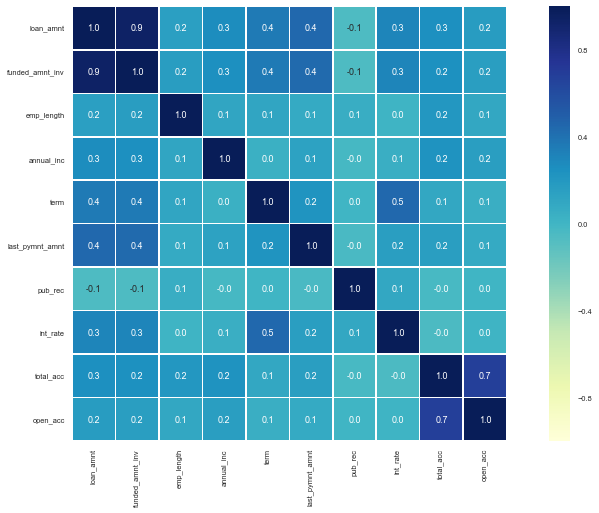

In [388]:
plt.figure(figsize=(15, 8))
sns.set()
sns.set(font_scale=.75)

ax = sns.heatmap(df_correlations[df_correlations.columns[0:]].corr(),annot=True,fmt=".1f", vmin=-1, vmax=1, linewidths=.5, cmap="YlGnBu", square=True)
ax.figure.axes[-1].yaxis.label.set_size(20)
plt.show()

In [348]:
# Get the loan amount for loans that were defaulted by each region.
# Most of the bad loans are from West & North East
final_loan_df_default = final_loan_df[(final_loan_df.loan_status == 'Charged Off')]
final_loan_df_default = final_loan_df_default.groupby(['region'])
final_loan_df_default_sum=final_loan_df_default['loan_amnt'].sum().reset_index(name='loan_amnt_sum')

final_loan_df_default_sum

,region,loan_amnt_sum
0,MidWest,9061250
1,NorthEast,17318100
2,SouthEast,15501700
3,SouthWest,6274725
4,West,19955600


In [350]:
# Most of the bad loans interest rate is high and more than 13.69
final_loan_df_default = final_loan_df[(final_loan_df.loan_status == 'Charged Off')]
final_loan_df_default_int = final_loan_df_default.groupby(['region'])
final_loan_df_default_int=final_loan_df_default_int['int_rate'].mean().reset_index(name='int_rate_mean')
final_loan_df_default_int = final_loan_df_default_int.sort_values(['int_rate_mean'],ascending=False)

final_loan_df_default_int

,region,int_rate_mean
3,SouthWest,13.973084
4,West,13.862580
1,NorthEast,13.853631
0,MidWest,13.774282
2,SouthEast,13.699112


In [352]:
# Most of the bad loans are from long term
final_loan_df_default = final_loan_df[(final_loan_df.loan_status == 'Charged Off')]
final_loan_df_default_term = final_loan_df_default.groupby(['term'])
final_loan_df_default_term=final_loan_df_default_term['loan_amnt'].sum().reset_index(name='loan_amnt_sum')
final_loan_df_default_term

,term,loan_amnt_sum
0,36,30297400
1,60,37813975


In [353]:
# Get the loan amount for loans that were defaulted by each region.

final_loan_df_new = final_loan_df.groupby(['region', 'loan_status'])
final_loan_df_new_sum=final_loan_df_new['loan_amnt'].sum().reset_index(name='loan_amnt_sum')
final_loan_df_region = final_loan_df_new_sum.sort_values(['region'],ascending=False)

final_loan_df_region

,region,loan_status,loan_amnt_sum
12,West,Charged Off,19955600
13,West,Current,4297825
14,West,Fully Paid,92422325
9,SouthWest,Charged Off,6274725
10,SouthWest,Current,2090200
11,SouthWest,Fully Paid,38523900
6,SouthEast,Charged Off,15501700
7,SouthEast,Current,4852600
8,SouthEast,Fully Paid,78689325
3,NorthEast,Charged Off,17318100


In [369]:
#Get "Bad Loans" from delinq2yrs people, see what was the rate of interest
delinq2yrs_int_rate_df = df_defaulters.loc[df_defaulters.loan_status == 'Charged Off']
delinq2yrs_int_rate_df = delinq2yrs_int_rate_df.reset_index()
#FInd which region the defaults belong 
delinq2yrs_int_rate_df['addr_state'].unique()

# Make a list with each of the regions by state.

west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']

delinq2yrs_int_rate_df['region'] = np.nan

def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'

delinq2yrs_int_rate_df['region'] = delinq2yrs_int_rate_df['addr_state'].apply(finding_regions)

Text(0.5,1,'Loans issued by Region')

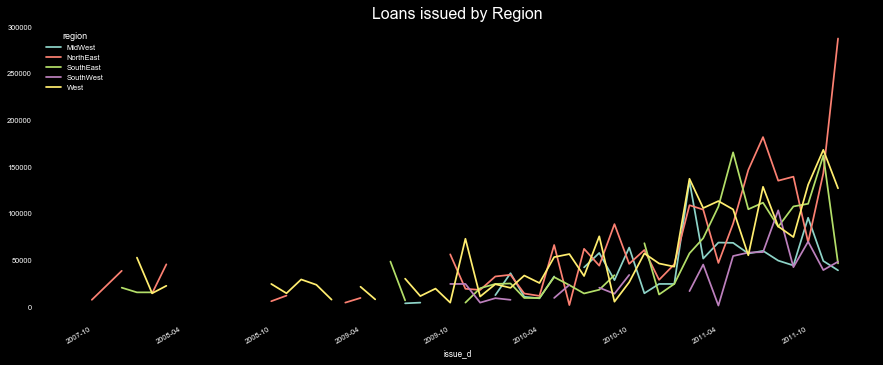

In [370]:
#Regions which has given Bad Loan which leads to defaulters
df_dates_delinq = pd.DataFrame(data=delinq2yrs_int_rate_df[['issue_d','region','loan_amnt']])
plt.style.use('dark_background')
cmap = plt.cm.Set3

by_issued_amount = df_dates_delinq.groupby(['issue_d', 'region']).loan_amnt.sum()
by_issued_amount.unstack().plot(stacked=False, colormap=cmap, grid=False, legend=True, figsize=(15,6))

plt.title('Loans issued by Region', fontsize=16)

#NorthEast region has the highest defaulters

Text(0,0.5,'Average loan amount issued')

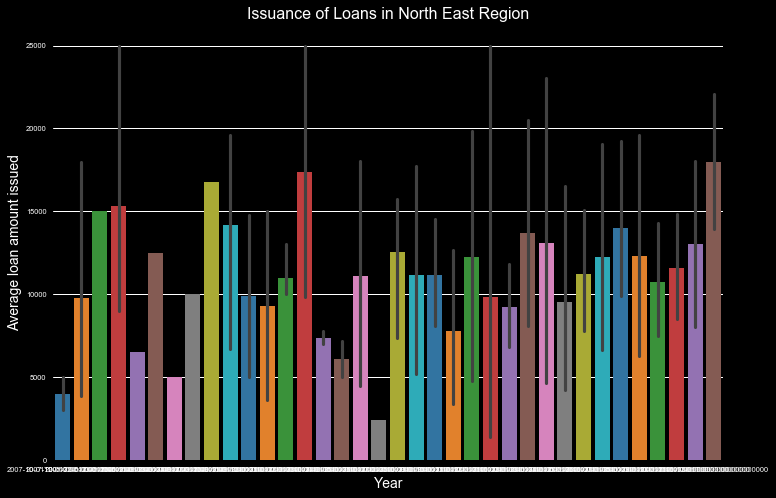

In [371]:
#North East region Loan Application Data
by_issued_amount_sum_NE = df_dates_delinq.loc[df_dates_delinq['region'] == 'NorthEast']

plt.figure(figsize=(12,8))
sns.barplot('issue_d', 'loan_amnt', data=by_issued_amount_sum_NE, palette='tab10')
plt.title('Issuance of Loans in North East Region', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average loan amount issued', fontsize=14)

Text(0,0.5,'Average loan amount issued')

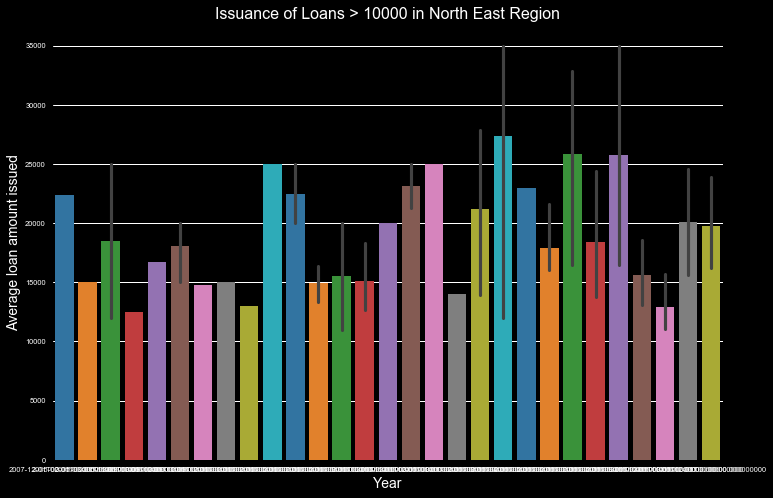

In [372]:
#For > 10000 loan amount for NorthEast Region
by_issued_amount_sum_NE = by_issued_amount_sum_NE.loc[by_issued_amount_sum_NE.loan_amnt > 10000]

plt.figure(figsize=(12,8))
sns.barplot('issue_d', 'loan_amnt', data=by_issued_amount_sum_NE, palette='tab10')
plt.title('Issuance of Loans > 10000 in North East Region', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average loan amount issued', fontsize=14)

Text(0,0.5,'loan amount')

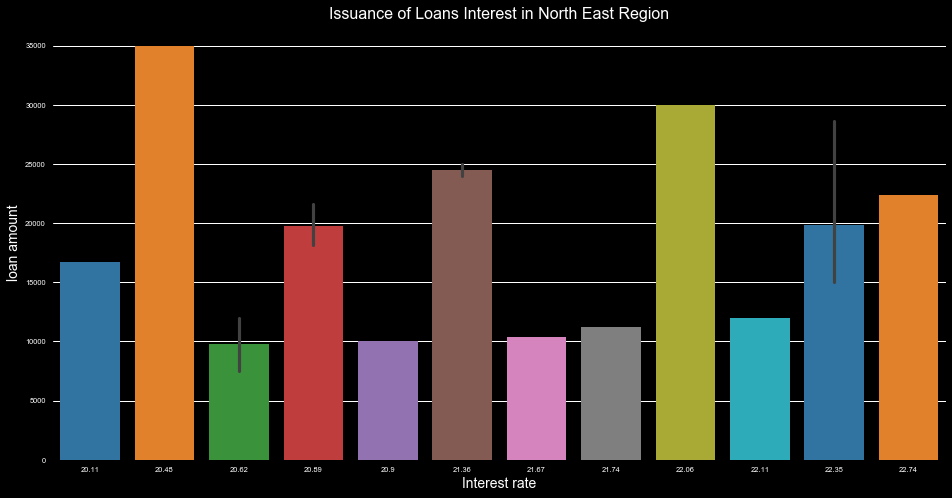

In [374]:
#For > $10000, interest rate for NorthEast Region where we can see highest interest rate is 22.74%
by_issued_amount_sum_NE_Rate = delinq2yrs_int_rate_df.loc[delinq2yrs_int_rate_df.loan_amnt > 10000]
by_issued_amount_sum_NE_Rate = delinq2yrs_int_rate_df.loc[delinq2yrs_int_rate_df.region == 'NorthEast']
by_issued_amount_sum_NE_Rate = by_issued_amount_sum_NE_Rate.reset_index()
by_issued_amount_sum_NE_Rate['int_rate'] 

#convert int_rate column to int column
by_issued_amount_sum_NE_Rate.int_rate = pd.to_numeric(by_issued_amount_sum_NE_Rate.int_rate, errors='coerce')

by_issued_amount_sum_NE_Rate = by_issued_amount_sum_NE_Rate.loc[by_issued_amount_sum_NE_Rate.int_rate > 20]

plt.figure(figsize=(16,8))
sns.barplot('int_rate', 'loan_amnt',data=by_issued_amount_sum_NE_Rate, palette='tab10')
plt.title('Issuance of Loans Interest in North East Region', fontsize=16)
plt.xlabel('Interest rate', fontsize=14)
plt.ylabel('loan amount', fontsize=14)

In [375]:
# Average interest by rate category and purposes 
final_loan_df_int = final_loan_df
final_loan_df_int['int_rate'].describe()
# Average interest is 13.00% Anything above this will be considered of high risk let's see if this is true.
final_loan_df_int['interest_payments'] = np.nan
lst = [final_loan_df_int]

for col in lst:
    col.loc[col['int_rate'] <= 13.23, 'interest_payments'] = 'Low'
    col.loc[col['int_rate'] > 13.23, 'interest_payments'] = 'High'
    
final_loan_df_int.head()

,member_id,loan_amnt,funded_amnt,addr_state,funded_amnt_inv,home_ownership,grade,sub_grade,term,emp_length,...,bad_state,avl_lines,int_paid,emi_paid_progress_perc,total_repayment_progress,loan_condition,region,income_category,loan_condition_int,interest_payments
0,1296599,5000,5000,AZ,4975.0,RENT,B,B2,36,10.0,...,0.0,6,863.16,57.324841,57.324841,Good Loan,SouthWest,Low,0,Low
1,1314167,2500,2500,GA,2500.0,RENT,C,C4,60,0.0,...,1.0,1,435.17,34.482759,39.165959,Bad Loan,SouthEast,Low,1,High
2,1313524,2400,2400,IL,2400.0,RENT,C,C5,36,10.0,...,0.0,8,605.67,57.324841,57.324841,Good Loan,MidWest,Low,0,High
3,1277178,10000,10000,CA,10000.0,RENT,C,C1,36,10.0,...,1.0,27,2231.89,57.324841,57.324841,Good Loan,West,Low,0,High
4,1311748,3000,3000,OR,3000.0,RENT,B,B5,60,1.0,...,0.0,23,1037.39,34.482759,34.482759,Good Loan,West,Low,0,Low


In [390]:
# Average interest by income category and purposes 
# Which purpose carries a higher interest rate and income category influence on risk

group_income_purpose = final_loan_df.groupby(['income_category', 'purpose'], as_index=False).int_rate.mean()
group_dti_purpose = final_loan_df.groupby(['income_category', 'purpose'], as_index=False).loan_amnt.mean()
loan_a = group_dti_purpose['loan_amnt'].values

# High Car 
new_groupby = group_income_purpose.assign(total_loan_amount=loan_a)
sort_group_income_purpose = new_groupby.sort_values(by="purpose", ascending=True)

sort_group_income_purpose

,income_category,purpose,int_rate,total_loan_amount
0,High,car,9.431667,12558.333333
13,Low,car,10.579578,6479.200000
27,Medium,car,10.191481,8881.327160
14,Low,credit_card,11.564976,10797.852512
1,High,credit_card,12.872459,18162.295082
28,Medium,credit_card,12.390227,16531.100000
29,Medium,debt_consolidation,13.259042,18470.116919
15,Low,debt_consolidation,12.360385,11812.569239
2,High,debt_consolidation,14.326698,20912.028302
16,Low,educational,11.650034,6219.482759


In [377]:
loan_count = final_loan_df.groupby(['income_category', 'purpose'])['loan_condition'].apply(lambda x: x.value_counts())
d={"loan_c": loan_count}
loan_c_df = pd.DataFrame(data=d).reset_index()
loan_c_df = loan_c_df.rename(columns={"level_2": "loan_condition"})
loan_c_df
# Good loans & Bad Loans
good_loans = loan_c_df.loc[loan_c_df['loan_condition'] == "Good Loan"].sort_values(by="income_category", ascending=True)
bad_loans = loan_c_df.loc[loan_c_df['loan_condition'] == "Bad Loan"].sort_values(by="income_category", ascending=True)
sort_group_income_purpose['good_loans_count'] = pd.Series(good_loans['loan_c'].values)
sort_group_income_purpose['bad_loans_count'] = pd.Series(bad_loans['loan_c'].values)
sort_group_income_purpose

,income_category,purpose,int_rate,total_loan_amount,good_loans_count,bad_loans_count
0,High,car,9.431667,12558.333333,12,7.0
27,Medium,car,10.191481,8881.327160,34,62.0
33,Medium,major_purchase,10.312996,12542.813765,28,250.0
13,Low,car,10.579578,6479.200000,2952,50.0
25,Low,vacation,10.800581,5197.601744,1226,54.0
19,Low,major_purchase,10.878170,7466.504982,495,293.0
35,Medium,moving,10.931884,12498.550725,610,11.0
23,Low,renewable_energy,11.183012,7309.939759,13750,149.0
17,Low,home_improvement,11.274443,9972.104072,66,87.0
39,Medium,vacation,11.372162,7933.783784,232,NaN


In [378]:
# Final Data Fully Paid & Charged Off for prediction
df_loanstatus_sliced = final_loan_df[(final_loan_df['loan_status']=="Fully Paid") | (final_loan_df['loan_status']=="Charged Off")]
df_loanstatus_current = final_loan_df[(final_loan_df['loan_status']=="Current")]
di = {"Fully Paid":1, "Charged Off":0}   #converting target variable number
df_final_target= df_loanstatus_sliced.replace({"loan_status": di})
# Current Loan Status
di_curr = {"Current":2}
df_curr= df_loanstatus_current.replace({"loan_status": di_curr})

features = ['loan_amnt','funded_amnt_inv','emp_length','annual_inc','home_ownership','grade','term',
            'last_pymnt_amnt', 'pub_rec', 'int_rate', 'total_acc','open_acc','loan_status'] 
df_data_clean = df_final_target[features]

In [379]:
# Prediction
predictions = pd.Series(np.ones(final_loan_df.shape[0]))

false_positive_filter = (predictions == 1) & (df_data_clean['loan_status'] == 0)
false_positive = len(predictions[false_positive_filter])

true_positive_filter = (predictions == 1) & (df_data_clean['loan_status'] == 1)
true_positive = len(predictions[true_positive_filter])

false_negative_filter = (predictions == 0) & (df_data_clean['loan_status'] == 1)
false_negative = len(predictions[false_negative_filter])

true_negative_filter = (predictions == 0) & (df_data_clean['loan_status'] == 0)
true_negative = len(predictions[true_negative_filter])

true_positive_rate = true_positive / (true_positive + false_negative)

false_positive_rate = false_positive / (false_positive + true_negative)

print (float(true_positive_rate))
print (float(false_positive_rate))

1.0
1.0


In [380]:
accuracy = float(true_positive + true_negative)/float(true_positive + false_positive+ false_negative + true_negative)
accuracy

0.8541358840760038

In [381]:

precision = float(true_positive)/float(true_positive + false_positive)
precision

0.8541358840760038

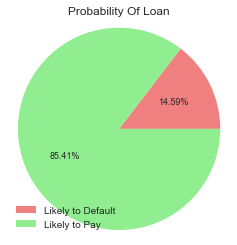

In [392]:
# Data to plot# Data t 
plt.figure(figsize=(10, 10))
labels = 'Likely to Default', 'Likely to Pay'
sizes = [1-precision, precision]
colors = ['lightcoral', 'lightgreen'] 
# Plot
plt.figure(figsize=(4,4))
plt.pie(sizes, colors=colors, autopct='%1.2f%%', shadow=False, startangle=0)
plt.title('Probability Of Loan', fontsize=12) 
plt.legend(labels, loc='lower left', fontsize=10)
plt.axis('equal')
plt.show()